In [ ]:
pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

In [29]:
# Load your time series data
# For example, assuming you have a DataFrame 'df' with a column 'value' representing your time series
df = pd.read_csv('National_Month_Year_Birth_Jada.csv')
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

In [30]:
df['Births'].sum()
#29284042

29282337

In [31]:

# Check for stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    # Check p-value
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [32]:
df1=df

In [16]:
# Make the time series stationary if needed
# For example, you can take the first difference

df1['stationary'] = df1['Births'].diff()
df1=df1.dropna()
#df['stationary'].isna().sum()
# Test for stationarity
test_stationarity(df1['stationary'])



ValueError: sample size is too short to use selected regression component

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:467: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: negative dimensions are not allowed

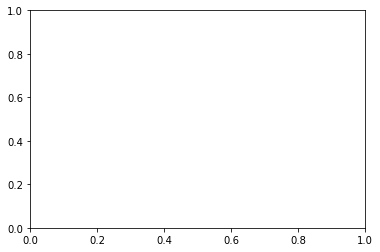

In [17]:
# Plot ACF and PACF to determine the order of differencing and ARMA terms
plot_acf(df1['stationary'], lags=20)
# plot_pacf(df['stationary'], lags=20)
plt.show()

# Determine the order of differencing (d), AR (p), and MA (q) terms based on ACF and PACF plots



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 0.

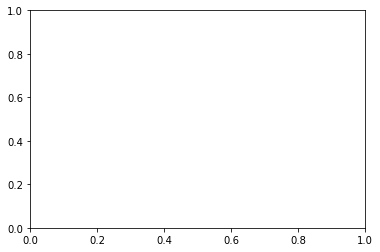

In [18]:
plot_pacf(df1['stationary'], lags=20)
plt.show()

In [33]:
# Set the order based on the analysis
# d = 1  # order of differencing
# p = 1  # order of autoregression
# q = 1  # order of moving average
# seasonal_order = (1, 1, 1, 12)  # seasonal order (SARIMA)

# Fit SARIMA model
model = SARIMAX(df['Births'],order=(4,0,3), seasonal_order=(1, 0, 0,12), enforce_stationarity=True, enforce_invertibility=False)
results = model.fit()

# Make predictions
forecast_steps = 36  # adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

df['Forecasted Value']=forecast_values

# Print the forecasted values
#print("Forecasted Values:")
print(forecast_values)
# Get confidence intervals
# conf_int = forecast.conf_int()

# Plot results
# plt.figure(figsize=(12, 6))
# plt.plot(df['value'], label='Original')
# plt.plot(forecast.predicted_mean, color='red', label='Forecast')
# plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
# plt.legend()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


94     303830.719383
95     313044.091394
96     297963.751271
97     276324.358829
98     299055.653296
99     280851.940445
100    300143.657433
101    299699.543402
102    309674.862830
103    315113.024972
104    303540.547045
105    305145.081101
106    301238.211223
107    310613.440043
108    295629.130675
109    281767.796630
110    296648.170932
111    284632.418369
112    298614.525748
113    298265.667726
114    307502.375082
115    309417.740534
116    303268.066849
117    301319.637701
118    301010.477831
119    306520.580950
120    295333.772179
121    284846.259549
122    294928.556816
123    287985.572712
124    296042.467409
125    298716.137936
126    303686.252890
127    306579.080465
128    301503.163437
129    298888.256199
Name: predicted_mean, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
predicted_values_1=pd.DataFrame()
predicted_values_1['Predicted Values']=results.fittedvalues
predicted_values_1.to_excel('Jada_Predicted_Values_20230124.xlsx', index = True)

In [ ]:

df = pd.read_csv('National_Month_Year_Birth_Jada.csv',index_col='Month_Year',parse_dates=True)  
r1 = seasonal_decompose(df['Births'], model ='additive') 
# ETS plot  
r1.plot() 

In [ ]:
df.to_excel('Jada_Birth_Forecasted_Values.xlsx', index = True)

In [ ]:
confidence_intervals